Dataset:
    Outlook Temperature Humidity    Wind Answer
0     sunny         hot     high    weak     no
1     sunny         hot     high  strong     no
2  overcast         hot     high    weak    yes
3      rain        mild     high    weak    yes
4      rain        cool   normal    weak    yes
Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

          no       1.00      0.00      0.00       3.0
         yes       0.00      1.00      0.00       0.0
        yes        1.00      0.00      0.00       1.0

    accuracy                           1.00       4.0
   macro avg       0.67      0.33      0.00       4.0
weighted avg       1.00      0.00      0.00       4.0



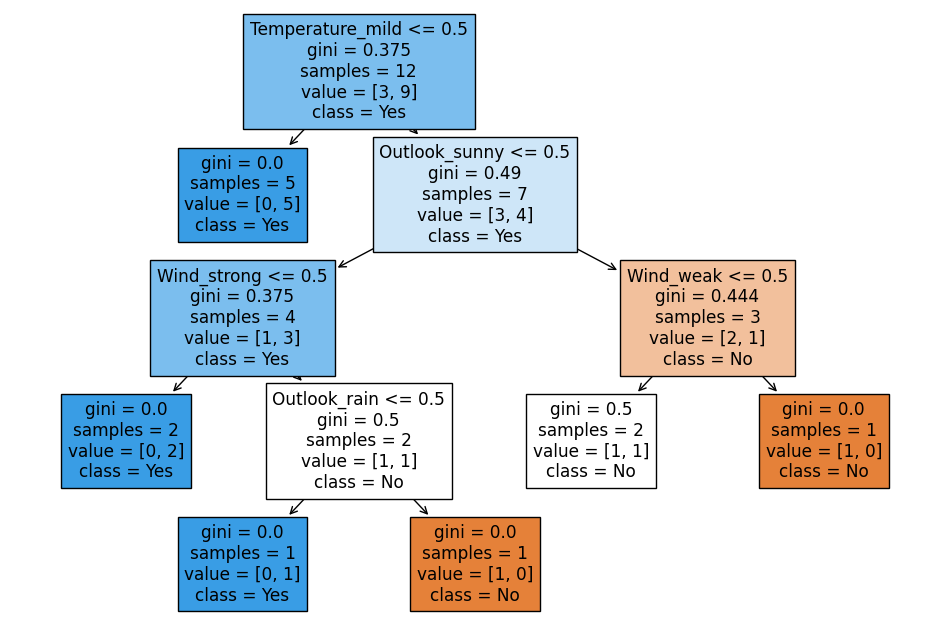

Prediction for new sample: No


In [6]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv(r"C:\Users\madha\Downloads\weatherdata.csv")

# Display the first few rows of the dataset
print("Dataset:")
print(data.head())

# Handle missing values
data.fillna(method='ffill', inplace=True)  # Forward fill missing values

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=['Outlook', 'Temperature', 'Humidity', 'Wind'])

# Splitting the dataset into features and target variable
X = data_encoded.drop(columns=['Answer'])  # Corrected target variable name
y = data_encoded['Answer']  # Corrected target variable name

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating decision tree classifier
clf = DecisionTreeClassifier()

# Training the classifier
clf.fit(X_train, y_train)

# Predicting on the testing set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

# Print accuracy and classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

# Visualizing the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=list(X.columns), class_names=['No', 'Yes'], filled=True)  # Convert to list
plt.show()

# Classifying a new sample
# Example: Outlook=Sunny, Temperature=Cool, Humidity=High, Wind=Weak
# Note: Make sure this sample has the same number of features as the dataset
new_sample = pd.DataFrame([[0, 0, 1, 0, 1, 0, 0, 1, 0,1]], columns=X.columns)  # Use DataFrame with feature names
prediction = clf.predict(new_sample)
print(f"Prediction for new sample: {'Yes' if prediction[0] == 1 else 'No'}")

In [7]:
data.head(5)

,Outlook,Temperature,Humidity,Wind,Answer
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes
